In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [28]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size,activation="sigmoid", learning_rate=0.1, epochs=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation_type=activation
        self.learning_rate = learning_rate
        self.epochs = epochs

        self.W1 = np.random.randn(self.hidden_size, self.input_size)    # weights from input to hidden layer
        self.b1 = np.zeros((self.hidden_size, 1))                       # bias from input to hidden layer
        self.W2 = np.random.randn(self.output_size, self.hidden_size)   # weights from hidden to output layer
        self.b2 = np.zeros((self.output_size, 1))                       # bias from hidden layer to output layer 

    def activation_function(self,x):
        if self.activation_type=="sigmoid":
            return 1 / (1 + np.exp(-x))
        elif self.activation_type=="tanh":
            return np.tanh(x)
        else:
            return np.maximum(0,x)   # relu function

    def activation_derivative(self,x):
        if self.activation_type=="sigmoid":
            return x*(1-x)
        elif self.activation_type=="tanh":
            return 1-x**2
        else:
            return np.where(x > 0, 1, 0)   #relu function 
            
    def forward(self,X):
       self.Z1 = np.dot(self.W1, X.T) + self.b1
       self.A1 = self.activation_function(self.Z1)  
       self.Z2 = np.dot(self.W2, self.A1) + self.b2
       self.A2 = self.activation_function(self.Z2)  

       return self.A2
        
    def backward(self,X,y):
        m=X.shape[0]
        y=y.T if y.shape[0] != self.output_size else y

        # Error

        dZ2 = self.A2 - y    # Predicted-Expected
        dW2 = (1 / m) * np.dot(dZ2, self.A1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
        
        dZ1 = np.dot(self.W2.T, dZ2) * self.activation_derivative(self.A1)
        dW1 = (1 / m) * np.dot(dZ1, X)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
        
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self,X,y):
        for _ in range(self.epochs):
            self.A2=self.forward(X)
            self.backward(X,y)

    def predict(self,X):
        predictions=self.forward(X)
        return np.argmax(predictions, axis=0) if self.output_size > 1 else (predictions > 0.5).astype(int)
        
np.random.seed(42)
X = np.random.randn(150, 2)
y = np.random.choice([0, 1, 2], size=150)

encoder = OneHotEncoder(sparse_output=False)

y_encoded = encoder.fit_transform(y.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
  




In [24]:
mlp_relu = MLP(input_size=2, hidden_size=5, output_size=3, activation='relu', learning_rate=0.1, epochs=5000)
mlp_relu.train(X_train, y_train)

In [25]:
mlp_tanh = MLP(input_size=2, hidden_size=5, output_size=3, activation='tanh', learning_rate=0.1, epochs=5000)
mlp_tanh.train(X_train, y_train)

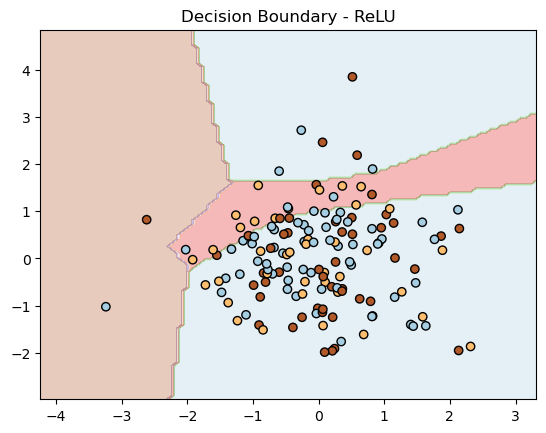

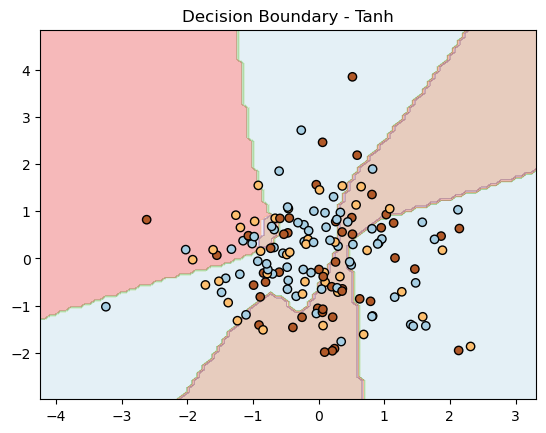

In [26]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = np.array([model.predict(np.array([[a, b]])) for a, b in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=np.argmax(y, axis=1), edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

plot_decision_boundary(mlp_relu, X, y_encoded, "Decision Boundary - ReLU")
plot_decision_boundary(mlp_tanh, X, y_encoded, "Decision Boundary - Tanh")

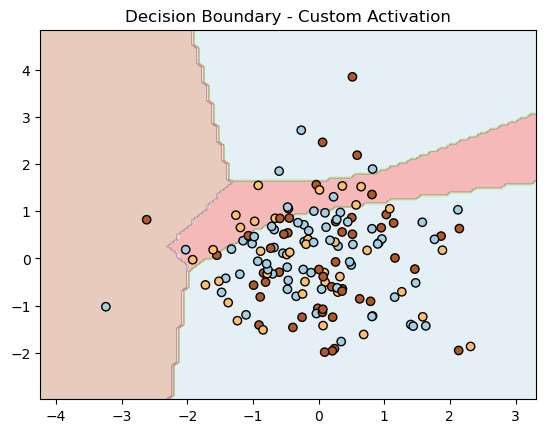

In [30]:
mlp_custom = MLP(input_size=2, hidden_size=5, output_size=3, activation='relu', learning_rate=0.1, epochs=5000)
mlp_custom.train(X_train, y_train)
plot_decision_boundary(mlp_custom, X, y_encoded, "Decision Boundary - Custom Activation")
